In [2]:
import swiftsimio as sw
import velociraptor as vr
import unyt
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [28]:
import numpy as np

test1 = np.array([[[1, 2, 3], [4, 5, 6], [1, 1, 1]], [[1, 1, 1], [1, 1, 1], [1, 1, 1]]])
print(test1.shape)
test1 = test1.reshape(1, 2, 3, 3)
print(test1.shape)

test2 = np.array([])
print(test2.shape)
# test2 = np.append(test2, test1)
print(test2.shape)
print(test2)
for i in range(10):
    try:
        test2 = np.append(test2, test1, axis=0)
    except:
        test2 = np.append(test2, test1).reshape(1, 2, 3, 3)
    print(test2.shape)

(2, 3, 3)
(1, 2, 3, 3)


ValueError: cannot reshape array of size 0 into shape (1,2,3,3)

In [6]:
import h5py
import swiftsimio as sw
import unyt
soapfile = h5py.File("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/SOAP/halo_properties_0077.hdf5", "r")
mask = sw.mask("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5")
position = soapfile["SO/500_crit/CentreOfMass"][190] * unyt.Mpc
radius = soapfile["SO/500_crit/SORadius"][190] * unyt.Mpc
load_box = [[position[0] - radius, position[0] + radius], 
            [position[1] - radius, position[1] + radius], 
            [position[2] - radius, position[2] + radius]]
mask.constrain_spatial(load_box)
halo_data = sw.load("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5", mask=mask)
halo_data.gas.flux = halo_data.gas.xray_luminosities.erosita_low
flux = sw.visualisation.projection.project_gas(
    halo_data,
    resolution=64, 
    project="flux", 
    region=[position[0] - radius, position[0] + radius, position[1] - radius, position[1] + radius],
    parallel = True
)

print(flux.shape)

In [9]:
print(load_box)

[[unyt_quantity(143.21023931, 'Mpc'), unyt_quantity(144.25906743, 'Mpc')], [unyt_quantity(3.35875931, 'Mpc'), unyt_quantity(4.40758743, 'Mpc')], [unyt_quantity(109.51347931, 'Mpc'), unyt_quantity(110.56230743, 'Mpc')]]


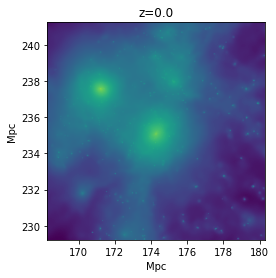

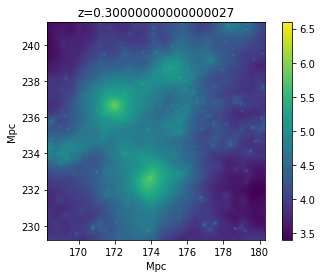

In [3]:
properties = vr.load("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/SOAP/halo_properties_0077.hdf5")

halo_index = 1#np.argmax(properties.root.so.v5xr_500_crit.totalmass)

halo_radius = properties.root.so.v5xr_500_crit.soradius[halo_index]
halo_position = properties.root.so.v5xr_500_crit.centreofmass[halo_index]



mask = sw.mask("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5")
load_box = [[halo_position[0] - halo_radius, halo_position[0] + halo_radius], 
            [halo_position[1] - halo_radius, halo_position[1] + halo_radius], 
            [halo_position[2] - halo_radius, halo_position[2] + halo_radius]]
mask.constrain_spatial(load_box)
halo_data = sw.load("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5", mask=mask)
observation = sw.visualisation.projection.project_gas(
    halo_data, 
    resolution=1024, 
    project="masses", 
    region=[halo_position[0] - halo_radius, halo_position[0] + halo_radius, halo_position[1] - halo_radius, halo_position[1] + halo_radius],
    parallel = True
)
extent = np.array([halo_position[0] - halo_radius, halo_position[0] + halo_radius, halo_position[1] - halo_radius, halo_position[1] + halo_radius])
plt.imshow(np.log10(observation.value), extent=extent/1000)
plt.title(f"z={1/halo_data.metadata.a - 1}")
plt.xlabel("Mpc")
plt.ylabel("Mpc")
plt.show()


mask = sw.mask("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0071/flamingo_0071.hdf5")
load_box = [[halo_position[0] - halo_radius, halo_position[0] + halo_radius], 
            [halo_position[1] - halo_radius, halo_position[1] + halo_radius], 
            [halo_position[2] - halo_radius, halo_position[2] + halo_radius]]
mask.constrain_spatial(load_box)
halo_data = sw.load("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0071/flamingo_0071.hdf5", mask=mask)
observation = sw.visualisation.projection.project_gas(
    halo_data, 
    resolution=1024, 
    project="masses", 
    region=[halo_position[0] - halo_radius, halo_position[0] + halo_radius, halo_position[1] - halo_radius, halo_position[1] + halo_radius],
    parallel = True
)
extend = np.array([halo_position[0] - halo_radius, halo_position[0] + halo_radius, halo_position[1] - halo_radius, halo_position[1] + halo_radius])
plt.imshow(np.log10(observation.value), extent=extent/1000)
plt.title(f"z={1/halo_data.metadata.a - 1}")
plt.xlabel("Mpc")
plt.ylabel("Mpc")
plt.colorbar()
plt.show()


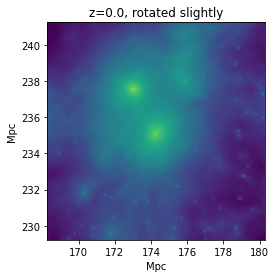

In [4]:
# properties = vr.load("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/SOAP/halo_properties_0077.hdf5")
from swiftsimio.visualisation import rotation
halo_index = 1#np.argmax(properties.root.so.v5xr_500_crit.totalmass)

halo_radius = properties.root.so.v5xr_500_crit.soradius[halo_index]
halo_position = properties.root.so.v5xr_500_crit.centreofmass[halo_index]
rotation_center = halo_position.copy()
rotation_center.convert_to_units(unyt.Mpc)

rotation_matrix = sw.visualisation.rotation.rotation_matrix_from_vector(np.array([0.0, 0.1, 1.0]))


mask = sw.mask("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5")
load_box = [[halo_position[0] - halo_radius, halo_position[0] + halo_radius], 
            [halo_position[1] - halo_radius, halo_position[1] + halo_radius], 
            [halo_position[2] - halo_radius, halo_position[2] + halo_radius]]
mask.constrain_spatial(load_box)
halo_data = sw.load("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5", mask=mask)

observation = sw.visualisation.projection.project_gas(
    halo_data, 
    resolution=1024, 
    project="masses", 
    region=[halo_position[0] - halo_radius, halo_position[0] + halo_radius, halo_position[1] - halo_radius, halo_position[1] + halo_radius],
    parallel = True,
    rotation_center=rotation_center,
    rotation_matrix=rotation_matrix
)

extent = np.array([halo_position[0] - halo_radius, halo_position[0] + halo_radius, halo_position[1] - halo_radius, halo_position[1] + halo_radius])
plt.imshow(np.log10(observation.value), extent=extent/1000)
plt.title(f"z={1/halo_data.metadata.a - 1}, rotated slightly")
plt.xlabel("Mpc")
plt.ylabel("Mpc")
plt.show()

[[2.1873420e+07 2.0547618e+07 2.0035260e+07 ... 5.1265432e+07
  5.3501684e+07 5.3772048e+07]
 [2.1247332e+07 2.0031918e+07 1.9622898e+07 ... 6.0226044e+07
  6.1198720e+07 6.1405040e+07]
 [2.0675978e+07 1.9627586e+07 1.9361002e+07 ... 7.4780832e+07
  7.0030688e+07 6.7902032e+07]
 ...
 [1.5246675e+09 1.3964503e+09 1.2224836e+09 ... 7.3659622e+08
  8.2162016e+08 9.1125376e+08]
 [1.4161106e+09 1.3113823e+09 1.1793797e+09 ... 6.8345018e+08
  7.6418234e+08 8.5159078e+08]
 [1.2869530e+09 1.1985651e+09 1.1014632e+09 ... 6.2737114e+08
  7.0349747e+08 7.8783181e+08]] 2.23262468110348e-9*Mpc**2*Msun/(Gyr**3*kpc**2) (Comoving)
[[1.13929250e+06 1.11047500e+06 1.09587175e+06 ... 1.08563775e+06
  1.02847956e+06 9.75221562e+05]
 [1.08716488e+06 1.05427012e+06 1.03404675e+06 ... 1.10398650e+06
  1.06336638e+06 1.02804481e+06]
 [1.02778225e+06 9.92687125e+05 9.68798438e+05 ... 1.14266962e+06
  1.12162225e+06 1.10760475e+06]
 ...
 [1.69925000e+07 1.34339250e+07 1.07062140e+07 ... 1.76703504e+08
  2.10795

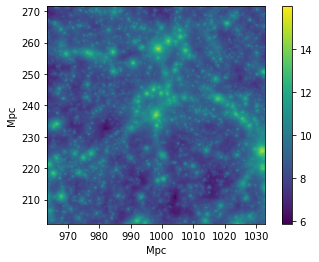

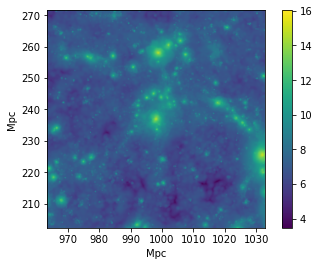

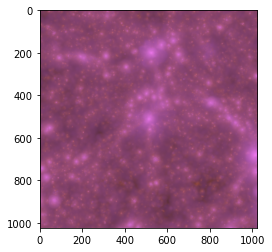

In [37]:
halo_index = 2#np.argmax(properties.root.so.v5xr_500_crit.totalmass)
halo_radius = properties.root.so.v200_crit.soradius[halo_index]*20
halo_position = properties.root.so.v200_crit.centreofmass[halo_index]

mask = sw.mask("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5")
load_box = [[halo_position[0] - halo_radius, halo_position[0] + halo_radius], 
            [halo_position[1] - halo_radius, halo_position[1] + halo_radius], 
            [halo_position[2] - halo_radius, halo_position[2] + halo_radius]]
mask.constrain_spatial(load_box)
halo_data = sw.load("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5", mask=mask)



halo_data.gas.red_flux = halo_data.gas.xray_luminosities.erosita_low
halo_data.gas.blue_flux = halo_data.gas.xray_luminosities.erosita_high

red_flux = sw.visualisation.projection.project_gas(
    halo_data, 
    resolution=1024, 
    project="red_flux", 
    region=[halo_position[0] - halo_radius, halo_position[0] + halo_radius, halo_position[1] - halo_radius, halo_position[1] + halo_radius],
    parallel = True
)
blue_flux = sw.visualisation.projection.project_gas(
    halo_data, 
    resolution=1024, 
    project="blue_flux", 
    region=[halo_position[0] - halo_radius, halo_position[0] + halo_radius, halo_position[1] - halo_radius, halo_position[1] + halo_radius],
    parallel = True
)

print(red_flux)
print(blue_flux)

extent = np.array([halo_position[0] - halo_radius, halo_position[0] + halo_radius, halo_position[1] - halo_radius, halo_position[1] + halo_radius])
plt.imshow(np.log10(red_flux.value), extent=extent/1000)
plt.xlabel("Mpc")
plt.ylabel("Mpc")
plt.colorbar()
plt.show()

extent = np.array([halo_position[0] - halo_radius, halo_position[0] + halo_radius, halo_position[1] - halo_radius, halo_position[1] + halo_radius])
plt.imshow(np.log10(blue_flux.value), extent=extent/1000)
plt.xlabel("Mpc")
plt.ylabel("Mpc")
plt.colorbar()
plt.show()

color_data = np.zeros((1024, 1024, 3))
norm = np.max([np.log10(red_flux.value), np.log10(blue_flux.value)])
color_data[:,:,0] = np.log10(red_flux.value) / norm
color_data[:,:,1] = np.log10(red_flux.value) / norm/2
color_data[:,:,2] = np.log10(blue_flux.value) / norm
plt.imshow(color_data)
plt.show()

/home/tol/.local/lib/python3.11/site-packages/swiftsimio/objects.py:261: RuntimeWarning: Mixing ufunc arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a**(-2.0) at a=1.0) for all arguments.
  warnings.warn(


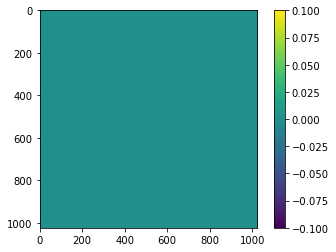

In [59]:
# red_flux.convert_to_units(unyt.erg/unyt.s /unyt.kpc**2)
# test_indices_inf = np.argwhere(red_flux == np.inf)
# test = []

# print(np.float64(red_flux))
# red_flux = np.float64(red_flux)
# for i in test_indices_inf:
#     print(red_flux[i[0], i[1]])
#     test.append(red_flux[i[0], i[1]])
# print(red_flux[].shape)
# print(properties.root.so.v200_crit.xrayluminosity[halo_index])
# print(np.sum(red_flux[red_flux < 1e80], dtype=np.float64))
# plt.imshow(red_flux == np.inf)
# plt.colorbar()
# print(blue_flux)

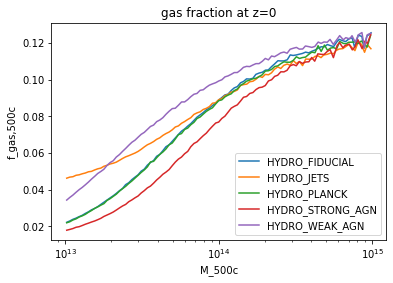

In [35]:
def plot_gas_frac(props, cosmology):

    # z71properties = vr.load("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/SOAP/halo_properties_0071.hdf5")
    # print(z71properties.a)
    mass = props.root.so.v500_crit.totalmass[props.root.so.v500_crit.totalmass > 1e13]
    gasmass = props.root.so.v500_crit.gasmass[props.root.so.v500_crit.totalmass > 1e13]

    bins = np.logspace(13, 15, 100)

    masses = []
    gasfracs = []
    for i in range(len(bins[:-1])):
        indices = np.logical_and(mass > bins[i], mass < bins[i+1])
        masses.append(np.mean(mass[indices]))
        gasfracs.append(np.mean(gasmass[indices] / mass[indices]))

    plt.plot(masses, gasfracs, label=cosmology)

cosmologies = ["HYDRO_FIDUCIAL", "HYDRO_JETS", "HYDRO_PLANCK", "HYDRO_STRONG_AGN", "HYDRO_WEAK_AGN"]

for cosmology in cosmologies:
    props = vr.load(f"/net/hypernova/data2/FLAMINGO/L1000N1800/{cosmology}/SOAP/halo_properties_0077.hdf5")
    plot_gas_frac(props, cosmology)


plt.xscale("log")
plt.xlabel("M_500c")
plt.ylabel("f_gas,500c")
plt.title(f"gas fraction at z=0")
plt.legend()
plt.show()

In [61]:
# halo_masses = properties.root.so.v200_crit.totalmass[properties.root.so.v5xr_500_crit.totalmass.nonzero()]
# # print(np.log10(np.min(halo_masses.value)))
# bins = np.logspace(np.log10(np.min(halo_masses.value)),np.log10(np.max(halo_masses.value)),64)
# N = np.histogram(halo_masses.value, bins=bins)

# M = N[1][:-1] #beginning of bin
# n = N[0]

# plt.hist(halo_masses.value, bins=bins)
# plt.xlabel("M")
# plt.ylabel("n")
# plt.show()

# print(M.shape, n.shape)
# dn = np.diff(n)
# dlogM = np.diff(np.log10(M))
# print(dn.shape, dlogM.shape)

(63,) (63,)
(62,) (62,)


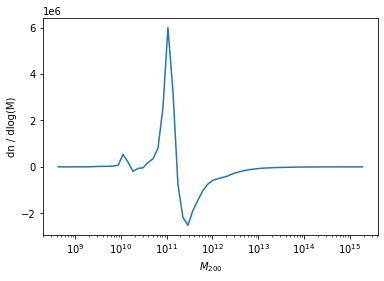

In [64]:
# plt.plot(M[1:], dn/dlogM)
# plt.xlabel(r"$M_{200}$")
# plt.ylabel("dn / dlog(M)")
# plt.xscale("log")
# # plt.yscale("log")
# plt.show()

In [65]:
# halo_position = properties.root.exclusivesphere.v100kpc.centreofmass[0]
# halo_radius = 100 * unyt.kpc

# mask = sw.mask("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5", spatial_only=False)

# load_box = [[halo_position[0] - halo_radius, halo_position[0] + halo_radius], 
#             [halo_position[1] - halo_radius, halo_position[1] + halo_radius], 
#             [halo_position[2] - halo_radius, halo_position[2] + halo_radius]]
# mask.constrain_spatial(load_box)
# halo_data = sw.load("/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/snapshots/flamingo_0077/flamingo_0077.hdf5", mask=mask)

In [76]:
# radius = np.linalg.norm(halo_data.gas.coordinates - halo_position, axis=1)
# velocity = np.linalg.norm(halo_data.gas.velocities, axis=1)
# print(halo_data.stars.)

SyntaxError: invalid syntax (1738366542.py, line 3)

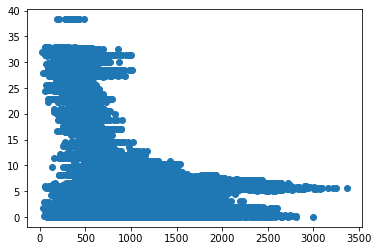

In [75]:
# plt.scatter(velocity, radius)
# plt.show()